In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
main_dish = pd.read_csv('main_dish.csv')
side_dish = pd.read_csv('side_dish.csv')
kimchi = pd.read_csv('removed_kimchi.csv')
rice = pd.read_csv('removed_rice.csv')
soup = pd.read_csv('removed_soup.csv')

In [3]:
main_dish.head()
# side_dish.head()
# kimchi.head()
# rice.head()
# soup.head()

,RecipeID,Name,식품대분류,식품상세분류,1회제공량(g),calories,carbohydrate,protein,fat,sugar,sodium
0,1,오징어순대,찜류,어패류찜,350,466.86,58.3,45.7,5.6,0.4,1258.71
1,2,대구찜,찜류,어패류찜,500,376.42,24.7,51.7,7.9,5.7,1898.67
2,3,동태찜,찜류,어패류찜,500,394.32,25.8,50.9,9.7,5.7,1985.60
3,4,돼지등갈비찜,찜류,육류찜,450,961.04,57.4,72.1,49.2,24.1,2395.17
4,5,돼지머리고기,찜류,육류찜,200,650.00,3.5,42.4,52.0,0.1,333.64


In [4]:
main_dish['calories']

0      466.86
1      376.42
2      394.32
3      961.04
4      650.00
        ...  
197     84.27
198     37.80
199    100.00
200    113.00
201     99.00
Name: calories, Length: 202, dtype: float64

In [5]:
main_dish.info()
# side_dish.info()
# kimchi.info()
# rice.info()
# soup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RecipeID      202 non-null    int64  
 1   Name          202 non-null    object 
 2   식품대분류         202 non-null    object 
 3   식품상세분류        202 non-null    object 
 4   1회제공량(g)      202 non-null    int64  
 5   calories      202 non-null    float64
 6   carbohydrate  202 non-null    float64
 7   protein       202 non-null    float64
 8   fat           202 non-null    float64
 9   sugar         202 non-null    float64
 10  sodium        202 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 17.5+ KB


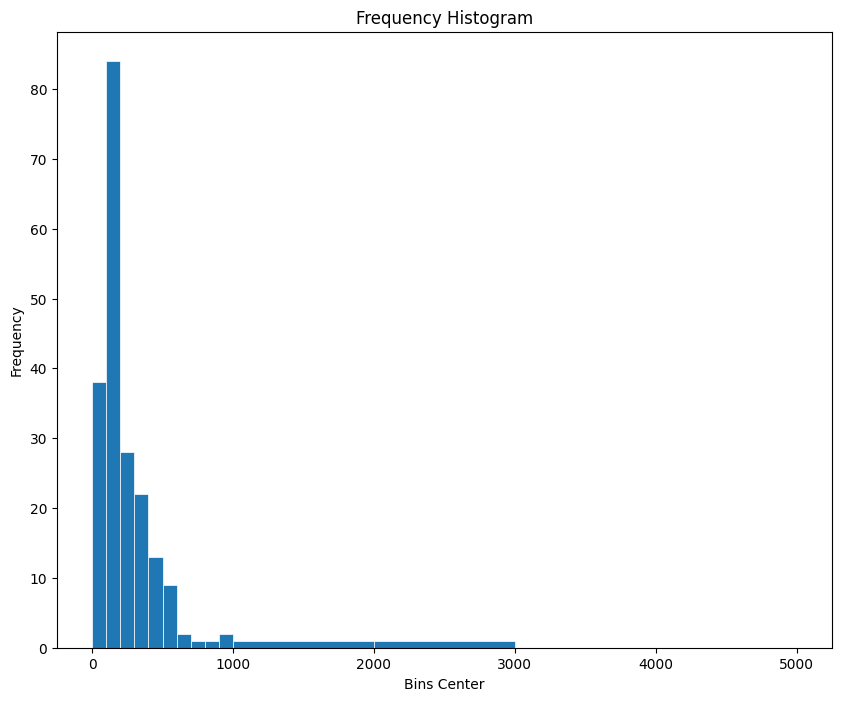

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(main_dish.calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="white")
plt.show()

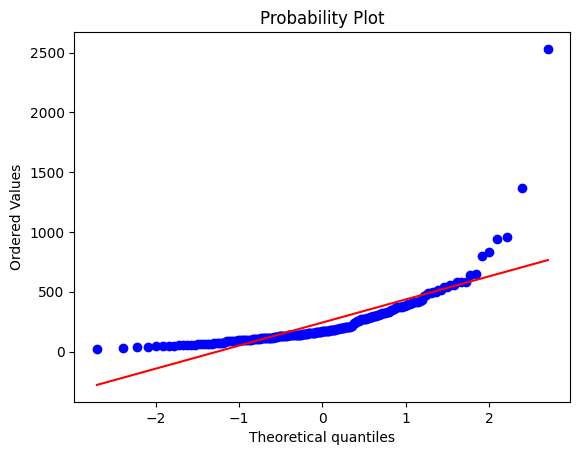

In [7]:
import pylab 
import scipy.stats as stats
stats.probplot(main_dish.calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

In [8]:
main_dish_dataset=main_dish.copy()
side_dish_dataset=side_dish.copy()
kimchi_dataset=kimchi.copy()
rice_dataset=rice.copy()
soup_dataset=soup.copy()
columns=['RecipeID','Name','calories','carbohydrate','protein','fat','sugar','sodium']
main_dish_dataset=main_dish_dataset[columns]
side_dish_dataset=side_dish_dataset[columns]
kimchi_dataset=kimchi_dataset[columns]
rice_dataset=rice_dataset[columns]
soup_dataset=soup_dataset[columns]

In [9]:
random_meal = []
for i in range(0, 100):
    list = []
    main_random_num = random.randint(1, len(main_dish_dataset.index))
    side_random_num = random.randint(1, len(side_dish_dataset.index))
    rice_random_num = random.randint(1, len(rice_dataset.index))
    kimchi_random_num = random.randint(1, len(kimchi_dataset.index))
    soup_random_num = random.randint(1, len(soup_dataset.index))
    list = [main_random_num, side_random_num, rice_random_num, kimchi_random_num, soup_random_num]
    random_meal.append(list)
print(random_meal)



[[65, 134, 20, 11, 34], [132, 34, 31, 16, 47], [104, 73, 51, 12, 186], [175, 115, 26, 6, 40], [137, 46, 31, 22, 112], [82, 78, 36, 25, 157], [40, 144, 52, 21, 152], [179, 59, 25, 22, 67], [44, 51, 49, 24, 153], [200, 100, 47, 18, 177], [142, 43, 29, 24, 114], [182, 125, 46, 16, 17], [31, 130, 35, 1, 46], [129, 74, 12, 9, 96], [15, 6, 13, 20, 163], [166, 22, 30, 8, 169], [1, 107, 3, 9, 157], [154, 67, 17, 16, 174], [169, 107, 24, 22, 183], [83, 39, 46, 12, 177], [185, 12, 19, 7, 70], [142, 81, 38, 6, 169], [182, 65, 23, 19, 60], [28, 86, 4, 24, 54], [86, 89, 12, 22, 17], [185, 47, 49, 23, 139], [60, 89, 8, 6, 112], [172, 2, 44, 2, 150], [165, 15, 32, 5, 156], [50, 129, 2, 13, 55], [116, 150, 2, 3, 104], [91, 137, 51, 26, 28], [146, 135, 39, 7, 114], [84, 43, 49, 20, 52], [106, 131, 3, 20, 32], [120, 18, 33, 23, 169], [173, 111, 54, 5, 42], [149, 41, 55, 23, 128], [190, 123, 6, 20, 172], [138, 7, 18, 21, 41], [168, 59, 12, 22, 112], [34, 107, 14, 10, 99], [31, 141, 15, 18, 164], [133, 10

In [10]:
random_meal_cal = [];random_meal_car = []
random_meal_pro= [];random_meal_fat = []
random_meal_sug = [];random_meal_sod = []
data_set_list = [main_dish_dataset, side_dish_dataset, rice_dataset, kimchi_dataset, soup_dataset]
for i in range(len(random_meal)):
        meal_cal, meal_car, meal_pro, meal_fat, meal_sug, meal_sod = 0, 0, 0, 0, 0, 0
        for j in range(5):
                recipe_id = random_meal[i][j]
                row = data_set_list[j][data_set_list[j]['RecipeID'] == recipe_id]
                if not row.empty:
                        row = row.iloc[0]
                        cal = row['calories'];car = row['carbohydrate']
                        pro = row['protein'];fat = row['fat']
                        sug = row['sugar'];sod = row['sodium']   

                        meal_cal += cal;meal_car += car
                        meal_pro += pro;meal_fat += fat
                        meal_sug += sug;meal_sod += sod

                random_meal_cal.append(meal_cal);random_meal_car.append(meal_car)
                random_meal_pro.append(meal_pro);random_meal_fat.append(meal_fat)
                random_meal_sug.append(meal_sug);random_meal_sod.append(meal_sod)

print(recipe_id)
print(row)
print(random_meal_cal)


97
RecipeID            97
Name             일본된장국
calories          20.6
carbohydrate      0.45
protein           1.42
fat               1.46
sugar             0.51
sodium          487.54
Name: 96, dtype: object
[139.78, 411.66999999999996, 996.38, 1012.9399999999999, 1432.73, 173.0, 207.25, 844.79, 871.3299999999999, 1060.1, 189.43, 263.53, 549.53, 576.74, 690.74, 294.79, 502.89, 1096.4299999999998, 1127.58, 1213.9499999999998, 132.0, 423.79, 1061.33, 1157.1899999999998, 1398.3799999999999, 58.42, 137.97, 781.13, 794.59, 841.44, 94.34, 305.34000000000003, 857.07, 870.1800000000001, 923.6800000000001, 96.52, 220.16, 778.26, 874.12, 935.23, 256.77, 309.09, 827.49, 868.16, 924.48, 100.0, 330.28, 743.25, 766.14, 1027.1399999999999, 135.0, 227.3, 867.78, 908.4499999999999, 1061.87, 318.37, 721.77, 1151.47, 1178.01, 1332.3899999999999, 498.92, 736.26, 1158.3899999999999, 1213.9199999999998, 1598.2999999999997, 144.0, 161.95, 878.49, 905.7, 1036.03, 90.79, 306.79, 985.8900000000001, 997.85000

In [11]:
print(random_meal)

[[65, 134, 20, 11, 34], [132, 34, 31, 16, 47], [104, 73, 51, 12, 186], [175, 115, 26, 6, 40], [137, 46, 31, 22, 112], [82, 78, 36, 25, 157], [40, 144, 52, 21, 152], [179, 59, 25, 22, 67], [44, 51, 49, 24, 153], [200, 100, 47, 18, 177], [142, 43, 29, 24, 114], [182, 125, 46, 16, 17], [31, 130, 35, 1, 46], [129, 74, 12, 9, 96], [15, 6, 13, 20, 163], [166, 22, 30, 8, 169], [1, 107, 3, 9, 157], [154, 67, 17, 16, 174], [169, 107, 24, 22, 183], [83, 39, 46, 12, 177], [185, 12, 19, 7, 70], [142, 81, 38, 6, 169], [182, 65, 23, 19, 60], [28, 86, 4, 24, 54], [86, 89, 12, 22, 17], [185, 47, 49, 23, 139], [60, 89, 8, 6, 112], [172, 2, 44, 2, 150], [165, 15, 32, 5, 156], [50, 129, 2, 13, 55], [116, 150, 2, 3, 104], [91, 137, 51, 26, 28], [146, 135, 39, 7, 114], [84, 43, 49, 20, 52], [106, 131, 3, 20, 32], [120, 18, 33, 23, 169], [173, 111, 54, 5, 42], [149, 41, 55, 23, 128], [190, 123, 6, 20, 172], [138, 7, 18, 21, 41], [168, 59, 12, 22, 112], [34, 107, 14, 10, 99], [31, 141, 15, 18, 164], [133, 10

In [12]:
max_daily_Calories=2700
max_daily_Carbohydrate=325
max_daily_Protein=200
max_daily_fat=100
max_daily_Sugar=40
max_daily_Sodium=2300
max_list=[max_daily_Calories, max_daily_Carbohydrate, max_daily_Protein, max_daily_fat, max_daily_Sugar, max_daily_Sodium]

max_one_meal_Calories=1500
max_one_meal_Carbohydrate=200
max_one_meal_Protein=150
max_one_meal_fat=60
max_one_meal_Sugar=30
max_one_meal_Sodium=1500
max_one_meal_list=[max_one_meal_Calories, max_one_meal_Carbohydrate, max_one_meal_Protein, max_one_meal_fat, max_one_meal_Sugar, max_one_meal_Sodium]

In [13]:
filtered_random_meal = random_meal.copy()
random_meal_nut = [random_meal_cal, random_meal_car, random_meal_pro, random_meal_fat, random_meal_sug, random_meal_sod]
for i in range(100):
    for j in range(6):
        if random_meal_nut[j][i] > max_one_meal_list[j]:
            filtered_random_meal[i] = 0
print(filtered_random_meal)
filtered_random_meal = [i for i in filtered_random_meal if i != 0]
print(filtered_random_meal)
print(len(filtered_random_meal)) # 한끼 식사 칼로리 총합

[[65, 134, 20, 11, 34], [132, 34, 31, 16, 47], 0, 0, 0, [82, 78, 36, 25, 157], [40, 144, 52, 21, 152], 0, 0, 0, [142, 43, 29, 24, 114], [182, 125, 46, 16, 17], [31, 130, 35, 1, 46], [129, 74, 12, 9, 96], 0, [166, 22, 30, 8, 169], [1, 107, 3, 9, 157], 0, 0, 0, [185, 12, 19, 7, 70], 0, 0, 0, 0, [185, 47, 49, 23, 139], [60, 89, 8, 6, 112], [172, 2, 44, 2, 150], [165, 15, 32, 5, 156], 0, [116, 150, 2, 3, 104], [91, 137, 51, 26, 28], [146, 135, 39, 7, 114], 0, 0, [120, 18, 33, 23, 169], [173, 111, 54, 5, 42], 0, 0, 0, [168, 59, 12, 22, 112], 0, 0, 0, 0, [184, 93, 15, 3, 4], [33, 34, 28, 6, 105], 0, 0, 0, [1, 97, 44, 5, 186], [148, 46, 4, 15, 67], 0, 0, 0, 0, 0, 0, 0, 0, [2, 37, 6, 1, 44], [23, 16, 33, 5, 70], 0, 0, 0, [129, 35, 1, 19, 82], [84, 1, 11, 15, 80], 0, 0, 0, [116, 60, 24, 11, 117], [16, 76, 14, 12, 146], 0, 0, 0, [157, 100, 2, 6, 91], [159, 51, 43, 21, 4], 0, 0, 0, [113, 85, 30, 26, 179], 0, 0, 0, 0, [103, 132, 9, 17, 4], [34, 106, 32, 25, 145], 0, 0, 0, [53, 16, 18, 5, 134], [41

In [15]:
filtered_meal_cal = [];filtered_meal_car = []
filtered_meal_pro= [];filtered_meal_fat = []
filtered_meal_sug = [];filtered_meal_sod = []
for i in range(len(filtered_random_meal)):
        meal_cal, meal_car, meal_pro, meal_fat, meal_sug, meal_sod = 0, 0, 0, 0, 0, 0
        for j in range(5):
                recipe_id = random_meal[i][j]
                row = data_set_list[j][data_set_list[j]['RecipeID'] == recipe_id]
                if not row.empty:
                        row = row.iloc[0]
                        cal = row['calories'];car = row['carbohydrate']
                        pro = row['protein'];fat = row['fat']
                        sug = row['sugar'];sod = row['sodium']   

                        meal_cal += cal;meal_car += car
                        meal_pro += pro;meal_fat += fat
                        meal_sug += sug;meal_sod += sod

        filtered_meal_cal.append(meal_cal);filtered_meal_car.append(meal_car)
        filtered_meal_pro.append(meal_pro);filtered_meal_fat.append(meal_fat)
        filtered_meal_sug.append(meal_sug);filtered_meal_sod.append(meal_sod)
print(filtered_meal_cal)
print(len(filtered_meal_cal))
print(len(filtered_meal_sod))

[1432.73, 1060.1, 690.74, 1213.9499999999998, 1398.3799999999999, 841.44, 923.6800000000001, 935.23, 924.48, 1027.1399999999999, 1061.87, 1332.3899999999999, 1598.2999999999997, 1036.03, 1063.8500000000001, 1124.1299999999999, 1342.77, 845.04, 991.87, 933.76, 624.75, 780.78, 950.01, 1801.29, 1161.62, 1413.0, 1476.9800000000002, 1057.64, 934.59, 493.51, 488.61, 1119.12, 1053.42, 912.08, 951.1200000000001, 662.5699999999999, 830.69, 725.9, 1149.74, 1390.1899999999998, 1278.05, 1281.0, 1544.63]
43
43


[1432.73, 1060.1, 690.74, 1213.9499999999998, 1398.3799999999999, 841.44, 923.6800000000001, 935.23, 924.48, 1027.1399999999999, 1061.87, 1332.3899999999999, 1598.2999999999997, 1036.03, 1063.8500000000001, 1124.1299999999999, 1342.77, 845.04, 991.87, 933.76, 624.75, 780.78, 950.01, 1801.29, 1161.62, 1413.0, 1476.9800000000002, 1057.64, 934.59, 493.51, 488.61, 1119.12, 1053.42, 912.08, 951.1200000000001, 662.5699999999999, 830.69, 725.9, 1149.74, 1390.1899999999998, 1278.05, 1281.0, 1544.63]
43
43
